In [9]:
# for linear algebra
import numpy as np
# for data processing
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# for scaling and encoding. Scaling is used to normalize the data within a particular range. Encoding is used to convert categorical data into numeric data.
from sklearn import preprocessing
# for the check the error and accuracy of the model
from sklearn import metrics
# for splitting the data into train and test data
from sklearn.model_selection import train_test_split
# for linear regression model
from sklearn.linear_model import LinearRegression
# for polynomial features
import math


#Loading Data
data = pd.read_csv('C:\\Users\ERALP\OneDrive\Desktop\Software Engineering\SWE599---Financial-Time-Series-Volatility-and-Return-Forecasting\Code\\akbank_data.csv')

#Seeing Data
data.head()



,Date,Hour,Open,High,Low,Close
0,12/2/2019,9:00:00,6.57,6.57,6.57,6.57
1,12/2/2019,10:00:00,6.57,6.59,6.51,6.52
2,12/2/2019,11:00:00,6.52,6.58,6.51,6.57
3,12/2/2019,12:00:00,6.57,6.57,6.46,6.48
4,12/2/2019,13:00:00,6.49,6.49,6.49,6.49


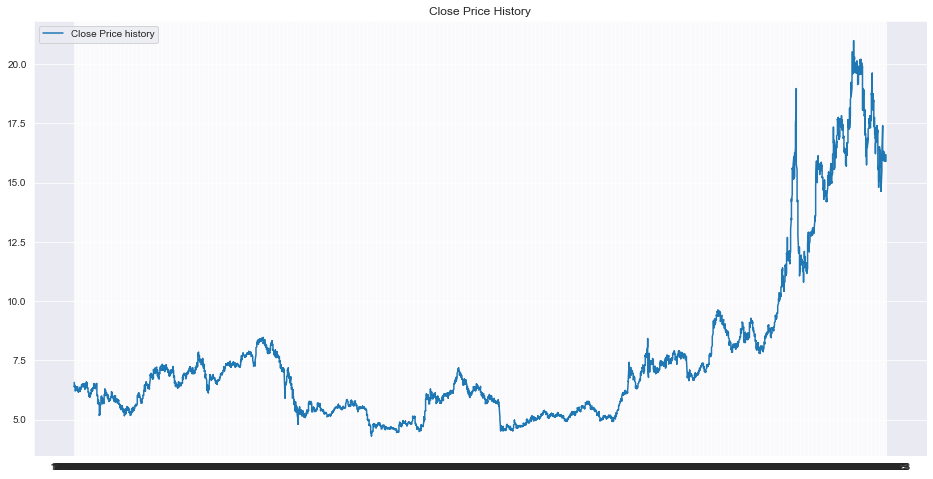

In [10]:
plt.figure(figsize=(16,8))
plt.plot(data['Date'], data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.legend()
plt.show()

In [11]:
#Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9992 non-null   object 
 1   Hour    9992 non-null   object 
 2   Open    9992 non-null   float64
 3   High    9992 non-null   float64
 4   Low     9992 non-null   float64
 5   Close   9992 non-null   float64
dtypes: float64(4), object(2)
memory usage: 468.5+ KB


In [12]:
# Checking for data description
data.describe()

,Open,High,Low,Close
count,9992.000000,9992.000000,9992.000000,9992.000000
mean,7.552604,7.586324,7.514919,7.551290
std,3.433072,3.460357,3.401024,3.431051
min,4.310000,4.350000,4.280000,4.310000
25%,5.440000,5.460000,5.420000,5.440000
50%,6.490000,6.520000,6.460000,6.480000
75%,7.780000,7.810000,7.760000,7.780000
max,20.980000,21.400000,20.500000,20.980000


In [13]:
# Separating the input and output columns

X = data[['High', 'Low', 'Open']].values
y = data['Close'].values



In [14]:
X

array([[ 6.57,  6.57,  6.57],
       [ 6.59,  6.51,  6.57],
       [ 6.58,  6.51,  6.52],
       ...,
       [15.89, 15.89, 15.89],
       [16.23, 15.82, 15.88],
       [16.29, 16.09, 16.13]])

In [15]:
y

array([ 6.57,  6.52,  6.57, ..., 15.89, 16.13, 16.17])

In [16]:
# Splitting the data into train and test data. The test data is 30% of the total data. Random state is used to select the same set of data points every time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [17]:
# Linear Regression Model

regressor = LinearRegression()

# Fitting the data in the Model

regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the values of test data
print(regressor.coef_)

[ 0.74708479  0.69478155 -0.4419393 ]


In [19]:
# Predicting the values of test data
print(regressor.intercept_)

5.2891770261354054e-05


In [20]:
# Prediction

#y_
predicted = regressor.predict(X_test)

print(predicted)

[ 6.95195981  6.28230288  7.15953048 ...  4.85873897 15.91387216
  6.08065534]


In [21]:
# Combining the predicted values and actual values in a dataframe

data1 = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

In [22]:
data1.head(20)

,Actual,Predicted
0,6.95,6.951960
1,6.32,6.282303
2,7.16,7.159530
3,5.47,5.467648
4,5.72,5.776874
5,5.15,5.158831
6,5.38,5.379338
7,4.59,4.605498
8,6.51,6.472812
9,6.38,6.379587


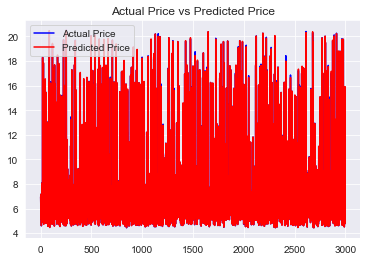

In [23]:
# Ploting timeseries graph indicating actual prices with blue line and predicted prices with red line.

plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(predicted, color='red', label='Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()



In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.015440655845131214
Mean Squared Error: 0.001137580253553245
Root Mean Squared Error: 0.03372803364492578


In [25]:
# Plotting the actual and predicted values

graph = data1.head(20)


<AxesSubplot:>

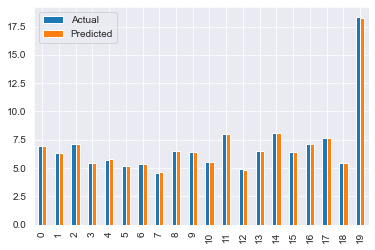

In [26]:
graph.plot(kind='bar')